## 1. READ FILE & processing data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/HCMUS-KHDL-K30/KR/main/hcm_house_data.csv')
df = df.drop(['price_1','price_2', 'avg_price_per_m2(mil)','avg_price_per_m2_desc', 'total_sqft_desc', 'floor_detail', 'type_of_house'], axis=1)
df.head()

,SalePrice,location_street,location_ward,location_district,location_city,number_of_bedroom,number_of_toilet,access_to_school,access_to_hospital,access_to_market,...,is_having_rooftop,alley_width,status_house,length,width,Legal_documents,view,loc_lat,loc_long,distance_to_central
0,3044.00000,Đường Lê Lai,Phường Bến Thành Quận 1,Quận 1,TP.HCM,54,54,1,1,1,...,1,15.0,Đang ở,20.00,8.20,Sổ hồng,Không xác định,10.770076,106.694042,0.514711
1,68031.84000,Đường Lê Trọng Tấn,Phường Bình Hưng Hòa Quận Bình Tân,Quận Bình Tân,TP.HCM,8,9,1,1,1,...,1,20.0,Để trống,52.30,8.00,Sổ hồng,Đông,10.813788,106.606332,11.276401
2,22160.06100,Đường Lô C Cư Xá Phú Lâm D,Phường 10 Quận 6,Quận 6,TP.HCM,21,21,0,0,0,...,0,10.0,Đang cho thuê,26.60,4.05,Sổ hồng,Tây Nam,10.737073,106.626365,8.881077
3,42668.84440,Đường Bạch Đằng,Phường 15 Quận Bình Thạnh,Quận Bình Thạnh,TP.HCM,7,8,0,0,1,...,1,15.0,Để trống,18.20,5.47,Sổ hồng,Bắc,10.796401,106.700330,2.785131
4,35430.20544,Đường Phạm Văn Bạch,Phường 15 Quận Tân Bình,Quận Tân Bình,TP.HCM,12,12,1,1,1,...,0,30.0,Để trống,30.72,5.11,Sổ hồng,Đông Nam,10.829271,106.641590,9.021097


## 1.1 Get info data

In [2]:
# review data
print(df.info)


<bound method DataFrame.info of          SalePrice             location_street  \
0       3044.00000                Đường Lê Lai   
1      68031.84000          Đường Lê Trọng Tấn   
2      22160.06100  Đường Lô C Cư Xá Phú Lâm D   
3      42668.84440             Đường Bạch Đằng   
4      35430.20544         Đường Phạm Văn Bạch   
...            ...                         ...   
27703   5083.12896         Đường Hoàng Hữu Nam   
27704   1430.52930         Đường Bùi Minh Trực   
27705   3025.52250                Đường Lê Lợi   
27706   1392.99564         Đường Phạm Thế Hiển   
27707   1622.57565      Đường Nguyễn Tất Thành   

                            location_ward location_district location_city  \
0                 Phường Bến Thành Quận 1            Quận 1        TP.HCM   
1      Phường Bình Hưng Hòa Quận Bình Tân     Quận Bình Tân        TP.HCM   
2                        Phường 10 Quận 6            Quận 6        TP.HCM   
3               Phường 15 Quận Bình Thạnh   Quận Bình Thạnh

## 1.2 Prepare data

Change data type to code

In [3]:
df['location_street_code'] = df['location_street'].astype('category')
df['location_street_code'] = df['location_street_code'].cat.codes
df['location_ward_code'] = df['location_ward'].astype('category')
df['location_ward_code'] = df['location_ward_code'].cat.codes
df['location_district_code'] = df['location_district'].astype('category')
df['location_district_code'] = df['location_district_code'].cat.codes
df['location_city_code'] = df['location_city'].astype('category')
df['location_city_code'] = df['location_city_code'].cat.codes
# df['type_of_house_code'] = df['type_of_house'].astype('category')
# df['type_of_house_code'] = df['type_of_house_code'].cat.codes
df['status_house_code'] = df['status_house'].astype('category')
df['status_house_code'] = df['status_house_code'].cat.codes
df['Legal_documents_code'] = df['Legal_documents'].astype('category')
df['Legal_documents_code'] = df['Legal_documents_code'].cat.codes
df['view_code'] = df['view'].astype('category')
df['view_code'] = df['view_code'].cat.codes
df = df[df['number_of_bedroom'] <= 10]
df = df[df['number_of_toilet'] <= 10]
df = df[df['alley_width'] <= 15]
# review data after filter
print(df.head())
print(df.describe())

     SalePrice      location_street              location_ward  \
3   42668.8444      Đường Bạch Đằng  Phường 15 Quận Bình Thạnh   
10  26521.7400           Đường Số 2            Phường 4 Quận 3   
11   4493.7600          Đường Số 59      Phường 14 Quận Gò Vấp   
12  24916.3560  Đường Điện Biên Phủ  Phường 17 Quận Bình Thạnh   
21  10776.4200  Đường Tô Hiến Thành          Phường 13 Quận 10   

   location_district location_city  number_of_bedroom  number_of_toilet  \
3    Quận Bình Thạnh        TP.HCM                  7                 8   
10            Quận 3        TP.HCM                  6                 6   
11       Quận Gò Vấp        TP.HCM                 10                 6   
12   Quận Bình Thạnh        TP.HCM                  3                 2   
21           Quận 10        TP.HCM                  5                 6   

    access_to_school  access_to_hospital  access_to_market  ...    loc_lat  \
3                  0                   0                 1  ...  10.796401

## Caculated distance

In [4]:
from geopy import distance
lat_long = df['loc_lat'].astype(str) + ',' + df['loc_long'].astype(str)
lat_long = list(map(eval, lat_long))
hcm_center = (10.769444, 106.681944)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, hcm_center).km, 1))
df['distance'] = miles

In [5]:
print(df.head(-50))

        SalePrice        location_street                  location_ward  \
3      42668.8444        Đường Bạch Đằng      Phường 15 Quận Bình Thạnh   
10     26521.7400             Đường Số 2                Phường 4 Quận 3   
11      4493.7600            Đường Số 59          Phường 14 Quận Gò Vấp   
12     24916.3560    Đường Điện Biên Phủ      Phường 17 Quận Bình Thạnh   
21     10776.4200    Đường Tô Hiến Thành              Phường 13 Quận 10   
...           ...                    ...                            ...   
27651   1683.8100             Đường Số 9          Phường 16 Quận Gò Vấp   
27652   4840.5600  Đường Nguyễn Thái Sơn           Phường 7 Quận Gò Vấp   
27653   6001.9800    Đường Trần Kế Xương        Phường 7 Quận Phú Nhuận   
27654   2084.6352   Đường Trần Xuân Soạn        Phường Tân Kiểng Quận 7   
27655   5056.3590    Đường Huỳnh Thị hai  Phường Tân Chánh Hiệp Quận 12   

      location_district location_city  number_of_bedroom  number_of_toilet  \
3       Quận Bình Thạ

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26271 entries, 3 to 27707
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SalePrice               26271 non-null  float64
 1   location_street         26271 non-null  object 
 2   location_ward           26271 non-null  object 
 3   location_district       26271 non-null  object 
 4   location_city           26271 non-null  object 
 5   number_of_bedroom       26271 non-null  int64  
 6   number_of_toilet        26271 non-null  int64  
 7   access_to_school        26271 non-null  int64  
 8   access_to_hospital      26271 non-null  int64  
 9   access_to_market        26271 non-null  int64  
 10  total_sqft              26271 non-null  float64
 11  number_of_floor         26271 non-null  float64
 12  is_having_basement      26271 non-null  int64  
 13  is_having_attic_floor   26271 non-null  int64  
 14  is_having_rooftop       26271 non-null

## 2. FEATURE SELECTION & DATA SPLIT

In [7]:
## 3. FEATURE SELECTION & DATA SPLIT
# # list feature

# features = ['location_street_code', 'location_ward_code', 'location_district_code', 'location_city_code',
#             'number_of_bedroom', 'number_of_toilet', 'access_to_school', 'access_to_hospital', 'access_to_market', 
#             'number_of_floor', 'is_having_basement', 'is_having_attic_floor',
#             'is_having_rooftop', 'alley_width', 'status_house_code', 'length','width', 'view_code', 'distance','Legal_documents_code']

features = ['number_of_bedroom', 'number_of_toilet', 'access_to_school', 'access_to_hospital', 'access_to_market', 
            'number_of_floor','alley_width', 'total_sqft','distance']


In [8]:
X = df[features]
X.head()

,number_of_bedroom,number_of_toilet,access_to_school,access_to_hospital,access_to_market,number_of_floor,alley_width,total_sqft,distance
3,7,8,0,0,1,7.5,15.00,656.7,3.6
10,6,6,1,1,1,7.0,8.00,219.0,0.4
11,10,6,1,0,0,7.0,5.00,30.2,9.5
12,3,2,0,0,1,7.0,8.19,115.8,4.7
21,5,6,0,0,0,6.5,3.00,176.4,2.0


In [9]:
# Transfrom data 
df['SalePrice'] = np.log1p(df['SalePrice'])
df['total_sqft'] = np.log1p(df['total_sqft'])


In [10]:
y = df['SalePrice']
y.describe()

count    26271.000000
mean         8.560763
std          0.634778
min          5.801937
25%          8.132704
50%          8.508999
75%          8.929593
max         11.421965
Name: SalePrice, dtype: float64

In [11]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# forward_selection
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_selection(X,y)

<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

['alley_width',
 'distance',
 'number_of_toilet',
 'total_sqft',
 'number_of_floor',
 'number_of_bedroom',
 'access_to_school']

In [12]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

backward_elimination(X,y)

['number_of_bedroom',
 'number_of_toilet',
 'access_to_school',
 'number_of_floor',
 'alley_width',
 'total_sqft',
 'distance']

In [13]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

stepwise_selection(X,y)

<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['alley_width',
 'distance',
 'number_of_toilet',
 'total_sqft',
 'number_of_floor',
 'number_of_bedroom',
 'access_to_school']

In [14]:
best_features = ['total_sqft',
 'alley_width',
 'distance',
 'access_to_school', 
 'access_to_hospital']

# ['is_having_rooftop',
#  'width',
#  'number_of_toilet',
#  'length',
#  'location_ward_code',
#  'alley_width',
#  'number_of_floor',
#  'distance',
#  'location_district_code',
#  'access_to_school',
#  'number_of_bedroom',
#  'is_having_basement',
#  'is_having_attic_floor',
#  'access_to_hospital',
#  'access_to_market',
#  'view_code']

# ['total_sqft',
#  'alley_width',
#  'distance',
#  'number_of_bedroom',
#  'number_of_floor',
#  'access_to_school',
#  'number_of_toilet', 
#  'access_to_hospital',
#  'access_to_market']

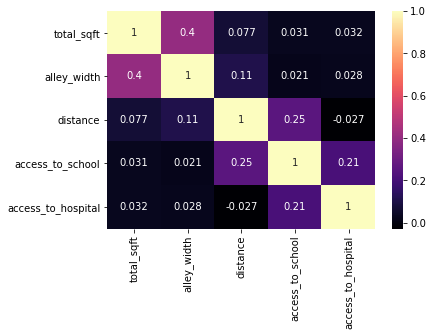

In [15]:
import seaborn as sb
sb.heatmap(df[best_features].corr(), annot=True, cmap='magma')

/Users/thao/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


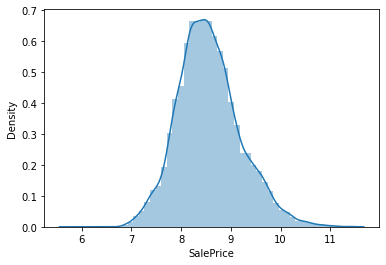

In [16]:
import seaborn as sns
#histogram of Sale price distribution
sns.distplot(df['SalePrice'])


In [17]:
from scipy.stats import skew
#Top skewed columns

skewed_features = df[best_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 1]
print(high_skew)

access_to_hospital    1.414134
alley_width           1.361951
dtype: float64


In [18]:
# #Transforming skewed columns
# for feature in high_skew.index:
#     df[feature] = np.log1p(df[feature])

In [19]:
from termcolor import colored as cl 
from sklearn.metrics import explained_variance_score as evs  # evaluation metric
from sklearn.metrics import r2_score as r2  # evaluation metric
from sklearn.model_selection import train_test_split 
# Split train & test dataset
X_var = df[best_features].values
y_var = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.2, random_state=0)


In [20]:

# 4.1. OLS

ols = LinearRegression()
results = ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. R-squared
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.698561005750517
-------------------------------------------------------------------------------


In [21]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.182e+05
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:05:51   Log-Likelihood:                         -26563.
No. Observations:               21016   AIC:                                  5.314e+04
Df Residuals:                   21011   BIC:                                  5.318e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
import statsmodels.api as sm

model = sm.OLS(y_var, X_var)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          5.263e+05
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:05:51   Log-Likelihood:                         -33111.
No. Observations:               26271   AIC:                                  6.623e+04
Df Residuals:                   26266   BIC:                                  6.627e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
print(results.params)


[ 1.85106462  0.00491482 -0.02620123  0.16367625  0.03746191]


In [24]:
s1 = pd.Series(best_features)
s2 = pd.Series(results.params)
s3 = pd.concat([s1, s2], axis =1)
s3

,0,1
0,total_sqft,1.851065
1,alley_width,0.004915
2,distance,-0.026201
3,access_to_school,0.163676
4,access_to_hospital,0.037462


## Model
Log(SalePrice) = 1.850679*Log(total_sqft) + 0.005466 *alley_width - 0.026513 *distance + 0.164837*access_to_school + 0.054710 * access_to_hospital


